## Customer Segmentation Analysis Part 1

### Q. What is Customer Segmentation and why is it important from marketing perspective?

#### Customer Segmentation: 
Customer segmentation is the practice of dividing a company's customers into groups that reflect similarity among customers in each group

It is important because it helps marketers to be more efficient in terms of time, money and other resources.

Import Libraries and Data

In [133]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

In [134]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


'C:\Program' is not recognized as an internal or external command,
operable program or batch file.


In [135]:
# Check encoding in the dataset because if you load the dataset without encoding an error will occur

# pip install chardet
# import the chardet library and use the detect method to find the type of encoding

import chardet 

# 'rb' means read in the file as binary
with open("Sales_data.csv", 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [137]:
# Load the dataset
data = pd.read_csv('Sales_data.csv', encoding= 'ISO-8859-1')
# encoding='latin-1'

In [138]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## Data Exploration

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [140]:
data.shape

(541909, 8)

In [141]:
data.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
PAINTED HEART WREATH WITH BELL           1
CURIOUS IMAGES SCRAP BOOK SET            1
BIRTHDAY BANNER TAPE                     1
wrong barcode (22467)                    1
COUNTRY COTTAGE  DOORSTOP GREEN          1
Name: Description, Length: 4223, dtype: int64

## Data Preprocessing

Remove Null Values

Remove Duplicate Values

In [142]:
# Take all the rows where customer ID not equal to blank
data= data[pd.notnull(data['CustomerID'])]

In [143]:
data.shape

(406829, 8)

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [145]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [146]:
# Removing duplicates
filtered_data=data[['Country','CustomerID']].drop_duplicates()

In [147]:
filtered_data.shape

(4380, 2)

In [148]:
filtered_data.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


In [149]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4380 entries, 0 to 541768
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     4380 non-null   object 
 1   CustomerID  4380 non-null   float64
dtypes: float64(1), object(1)
memory usage: 102.7+ KB


## Data Insights

#### Top 10 country customer data

In [150]:
# Check the country wise distribution
data.Country.value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [151]:
filtered_data.Country.value_counts()[:10]

United Kingdom    3950
Germany             95
France              87
Spain               31
Belgium             25
Switzerland         21
Portugal            19
Italy               15
Finland             12
Austria             11
Name: Country, dtype: int64

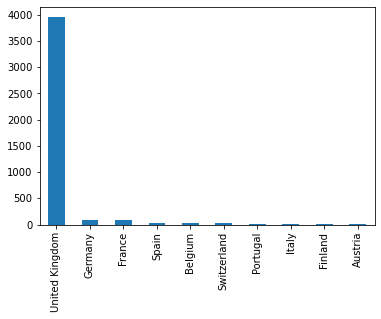

In [152]:
# Plot the data
filtered_data.Country.value_counts()[:10].plot(kind='bar')

## Q. What do you observe?

Ans: We can see United kingdom has highest number of customers while Portugal, Italy, Finland and Austria has lowest number of customer.

In [153]:
## Filter data by the top most country
uk_data=data[data.Country=='United Kingdom']

In [154]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


## Q. What do you observe? Which column needs special attention?

Ans: The above information is regarding Uk data in which it is is clearly seen that the Quantity column needs special attention as it has negative value for minimum count.
    value cannot be negative.
    

In [155]:
uk_data = uk_data[(uk_data['Quantity'] > 0)]

In [156]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354345 non-null  object 
 1   StockCode    354345 non-null  object 
 2   Description  354345 non-null  object 
 3   Quantity     354345 non-null  int64  
 4   InvoiceDate  354345 non-null  object 
 5   UnitPrice    354345 non-null  float64
 6   CustomerID   354345 non-null  float64
 7   Country      354345 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.3+ MB


In [157]:
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [158]:
# Filter the required columns only
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [159]:
# Calculate Total Price
uk_data['TotalPrice'] = uk_data['Quantity'] * uk_data['UnitPrice']

## Time frame of data

In [160]:
# Check Min and Max dates

print(uk_data['InvoiceDate'].min())
print(uk_data['InvoiceDate'].max())

1/10/2011 10:32
9/9/2011 9:52


## Q. Comment on the above results.

The date displayed is wrong as it is object as it should be in string.

#### Perform RFM Analysis

For Recency, Calculate the number of days between present date and date of last purchase for each customer.

For Frequency, Calculate the number of orders for each customer.

For Monetary, Calculate sum of purchase price for each customer

In [161]:
# Store a date as a reference point for recency calculations
PRESENT = dt.datetime(2011, 12, 10)

# Convert date to datetime format
uk_data['InvoiceDate'] = pd.to_datetime(uk_data['InvoiceDate'])

In [162]:
uk_data['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [163]:
uk_data['InvoiceNo'].value_counts().head()

576339    542
579196    533
580727    529
578270    442
573576    435
Name: InvoiceNo, dtype: int64

#### Q. Comment on the above results

Ans: There are more products with the same invoice number.

In [164]:
orders = uk_data.groupby(['InvoiceNo', 'InvoiceDate', 'CustomerID']).agg({'TotalPrice': lambda x: x.sum()}).reset_index()
orders.head()

,InvoiceNo,InvoiceDate,CustomerID,TotalPrice
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [165]:
rfm= uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [166]:
rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [167]:
# Rename the columns 
rfm.columns=['monetary','frequency','recency']

In [168]:
rfm['recency'] = rfm['recency'].astype(int)

In [169]:
rfm['monetary'] = rfm['monetary'].astype(int)

In [170]:
rfm.head()

,monetary,frequency,recency
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942


## Q. What is wrong with this table think ??

Ans: It should be Recency, frequency and Monetary

In [171]:
# Change the column names
rfm.columns=['recency','frequency','monetary']

## Create Visuals

Histogram for Recency Data

Histogram for Frequency Data

Histogram for Monetary Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025BCA503B20>]],
      dtype=object)

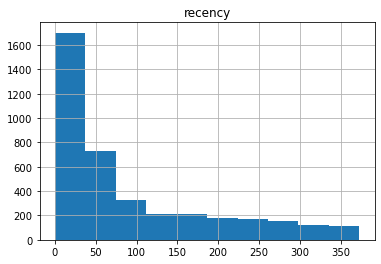

In [222]:
# Histogram for Recency Data (UK)
rfm.hist(column='recency')

## Q. What does this above chart tell ?

This tells us how recently has the customer has shopped. The x-axis shows that how many customers has shoped recently.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025BCA638AF0>]],
      dtype=object)

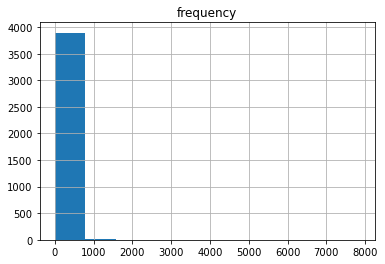

In [223]:
# Histogram for Frequency Data (UK)

rfm.hist(column='frequency')

## Q. What does this above chart tell ?

This graph shows how frequent has the customer shopped with the company. This graph shows that most of them shopes between 0 and 100.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025BCA812A00>]],
      dtype=object)

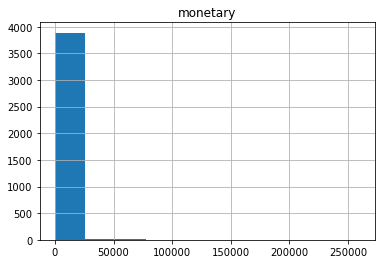

In [224]:
# Histogram for Monetary Data (UK)
rfm.hist(column='monetary')

## Q. What does this above chart tell ?

How much amount of monay a customer has spent on purchases. this graph shows that most of customers shops between 0 and 2500 and non of them has shopped more than 75000.

In [225]:
# Save the cleaned file
rfm.to_csv('rfm.csv')

## Calcualte the RFM Score

In [226]:
# Use quintiles to to make 5 equal parts based on the available values. Each quintiles contains 20% of the population. 
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'recency': {0.2: 12.0, 0.4: 32.0, 0.6: 71.0, 0.8: 178.0},
 'frequency': {0.2: 13.0, 0.4: 29.0, 0.6: 58.0, 0.8: 120.0},
 'monetary': {0.2: 241.0, 0.4: 465.0, 0.6: 897.0, 0.8: 1957.0}}

In [227]:
# Define functions to assign ranks from 1 to 5. 
# A lower Recency value is better and higher Frequency and Monetary values are better. 
# We will have to write two separate functions

In [228]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

In [229]:
# Calculate RFM score for each customer

rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [230]:
# Combine the scores
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment,Segments,Segment1
CustomerID,,,,,,,,,,
12346.0,325,1,77183,1,1,5,115,at risk,at risk,at risk
12747.0,2,103,4196,5,4,5,545,loyal customers,champions,loyal customers
12748.0,0,4596,33719,5,5,5,555,loyal customers,champions,loyal customers
12749.0,3,199,4090,5,5,5,555,loyal customers,champions,loyal customers
12820.0,3,59,942,5,4,4,544,champions,champions,loyal customers


In [231]:
# Create the customer segments based on your knowledge. 
# Create 6 segments based on R and F scores

segments = {
    '[1-2][1-4]': 'at risk',
    '[1-2]5': 'can\'t loose',
    '3[1-3]': 'needs attention',
    '[3-4][4-5]': 'loyal customers',
    '[4-5]1': 'new customers',
    '[4-5][2-5]': 'champions'
    
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment,Segments,Segment1
CustomerID,,,,,,,,,,
12346.0,325,1,77183,1,1,5,115,at risk,at risk,at risk
12747.0,2,103,4196,5,4,5,545,champions,champions,loyal customers
12748.0,0,4596,33719,5,5,5,555,champions,champions,loyal customers
12749.0,3,199,4090,5,5,5,555,champions,champions,loyal customers
12820.0,3,59,942,5,4,4,544,champions,champions,loyal customers


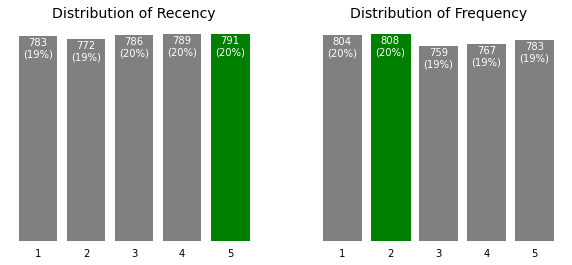

In [232]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='gray')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('green')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')
        
plt.show()

## Q. What do you observe with the above charts

The above charts shows the distribution of recency and frequency distributed in five quintiles and the one with the highest number are highited in the graph.

In [233]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

segments_counts

can't loose          74
new customers       146
needs attention     486
loyal customers     722
champions          1012
at risk            1481
Name: Segment, dtype: int64

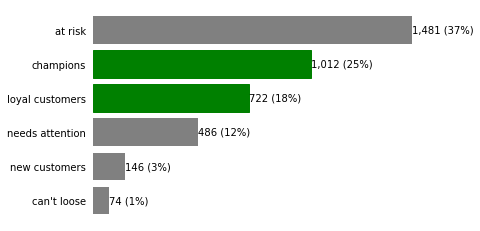

In [234]:
# Distribution of Segments
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

## Q. Comment on the above chart

This chart gives the information about what percentage of customers from this data are champions and what percent of total are the loyal customers. Both of this are highlited in green color whereas we can also see the other categories included which are "at risk", "need attention", "new customers" "can't loose". This chart seems to be very important as this gives overview of what are the customers they need to focus more.

## Q. Who are the best customers?

In [185]:
rfm[rfm['RFM Score']=='555'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment,Segments
CustomerID,,,,,,,,,
18102.0,0,431,259657,5,5,5,555,champions,champions
17450.0,8,337,194550,5,5,5,555,champions,champions
17511.0,2,963,91062,5,5,5,555,champions,champions
16684.0,4,277,66653,5,5,5,555,champions,champions
14096.0,4,5111,65164,5,5,5,555,champions,champions


## Q. Which customers are likely to churn?

In [186]:
#Customers who's recency value is low

rfm[rfm['R'] <= 1 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment,Segments
CustomerID,,,,,,,,,
12346.0,325,1,77183,1,1,5,115,at risk,at risk
15749.0,235,10,44534,1,1,5,115,at risk,at risk
15098.0,182,3,39916,1,1,5,115,at risk,at risk
13093.0,275,159,7832,1,5,5,155,can't loose,can't loose
17850.0,372,297,5391,1,5,5,155,can't loose,can't loose


## Q. Which customers we are going to loose?

In [187]:
#Customers who's recency, frequency and monetary values are low 

rfm[rfm['RFM Score']=='111'].sort_values('recency',ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment,Segments
CustomerID,,,,,,,,,
13747.0,373,1,79,1,1,1,111,at risk,at risk
14237.0,373,9,161,1,1,1,111,at risk,at risk
17643.0,373,8,101,1,1,1,111,at risk,at risk
15350.0,373,5,115,1,1,1,111,at risk,at risk
13011.0,372,3,50,1,1,1,111,at risk,at risk


## Q. Who are the loyal customers?

In [188]:
#Customers with high frequency value

rfm[rfm['F'] >= 3 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment,Segments
CustomerID,,,,,,,,,
18102.0,0,431,259657,5,5,5,555,champions,champions
17450.0,8,337,194550,5,5,5,555,champions,champions
17511.0,2,963,91062,5,5,5,555,champions,champions
16029.0,38,242,81024,3,5,5,355,loyal customers,loyal customers
16684.0,4,277,66653,5,5,5,555,champions,champions


## Calculate RFM scores using 4 quintiles instead of 5 and answer all the questions again

In [189]:
# Use quintiles to to make 4 equal parts based on the available values. Each quintiles contains 25% of the population. 
quintiles = rfm[['recency', 'frequency', 'monetary']].quantile([.25, .50, .75]).to_dict()
quintiles

{'recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'monetary': {0.25: 300.0, 0.5: 651.0, 0.75: 1575.0}}

In [190]:
# Define functions to assign ranks from 1 to 5. 
# A lower Recency value is better and higher Frequency and Monetary values are better. 
# We will have to write two separate functions

In [191]:
def r_score(x):
    if x <= quintiles['recency'][.25]:
        return 4
    elif x <= quintiles['recency'][.50]:
        return 3
    elif x <= quintiles['recency'][.75]:
        return 2

    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.25]:
        return 1
    elif x <= quintiles[c][.50]:
        return 2
    elif x <= quintiles[c][.75]:
        return 3
    else:
        return 4 

In [192]:
# Calculate RFM score for each customer

rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['M'] = rfm['monetary'].apply(lambda x: fm_score(x, 'monetary'))

In [193]:
# Combine the scores
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment,Segments
CustomerID,,,,,,,,,
12346.0,325,1,77183,1,1,4,114,at risk,at risk
12747.0,2,103,4196,4,4,4,444,champions,champions
12748.0,0,4596,33719,4,4,4,444,champions,champions
12749.0,3,199,4090,4,4,4,444,champions,champions
12820.0,3,59,942,4,3,3,433,champions,champions


In [236]:
# Create the customer segments based on your knowledge. 
# Create 4 segments based on R and F scores

segments = {
    '[1-2][1-2]': 'at risk',
    '[2-4][3-4]': 'loyal customers',
    '[3-4]1': 'new customers',
    '[3-4][2-4]': 'champions'
    
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segments, regex=True)
rfm.head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment,Segments,Segment1
CustomerID,,,,,,,,,,
12346.0,325,1,77183,1,1,5,115,at risk,at risk,at risk
12747.0,2,103,4196,5,4,5,545,54,champions,loyal customers
12748.0,0,4596,33719,5,5,5,555,55,champions,loyal customers
12749.0,3,199,4090,5,5,5,555,55,champions,loyal customers
12820.0,3,59,942,5,4,4,544,54,champions,loyal customers


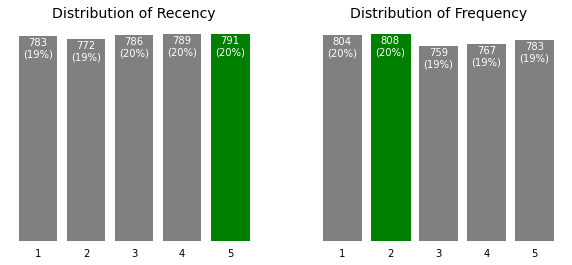

In [237]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='gray')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('green')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')
        
plt.show()

## Q. What do you observe with the above charts

The above charts shows the distribution of recency and frequency distributed in 4 quintiles and the one with the highest number are highited in the graph.

In [212]:
# count the number of customers in each segment
segment_count = rfm['Segment1'].value_counts().sort_values(ascending=True)
segment_count

14                   43
13                  149
new customers       264
champions           364
at risk            1351
loyal customers    1750
Name: Segment1, dtype: int64

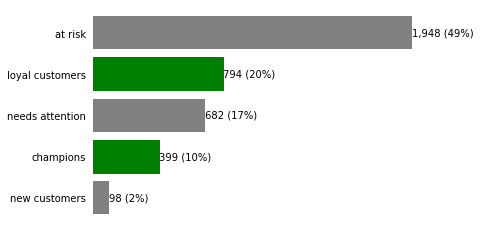

In [76]:
# Distribution of Segments
fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_count)),
              segments_count,
              color='gray')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_count)))
ax.set_yticklabels(segments_count.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_count.index[i] in ['champions', 'loyal customers']:
            bar.set_color('green')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_count.sum())),
                va='center',
                ha='left'
               )

plt.show()

## Q. Comment on the above chart¶

This chart gives the information about what percentage of customers from this data are champions and what percent of total are the loyal customers. Both of this are highlited in green color whereas we can also see the other categories included which are "at risk", "need attention", "new customers". This chart seems to be very important as this gives overview of what are the customers who needs more focus.

## Q. Who are the best customers?

In [77]:
rfm[rfm['RFM Score']=='444'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
18102.0,0,431,259657,4,4,4,444,loyal customers
17450.0,8,337,194550,4,4,4,444,loyal customers
17511.0,2,963,91062,4,4,4,444,loyal customers
16684.0,4,277,66653,4,4,4,444,loyal customers
14096.0,4,5111,65164,4,4,4,444,loyal customers


## Q. Which customers are likely to churn?

In [78]:
#Customers who's recency value is low

rfm[rfm['R'] <= 1 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
12346.0,325,1,77183,1,1,4,114,at risk
15749.0,235,10,44534,1,1,4,114,at risk
15098.0,182,3,39916,1,1,4,114,at risk
13093.0,275,159,7832,1,4,4,144,at risk
12980.0,157,20,7374,1,2,4,124,at risk


## Q. Which customers we are going to loose?

In [79]:
#Customers who's recency, frequency and monetary values are low 

rfm[rfm['RFM Score']=='111'].sort_values('recency',ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
13065.0,373,14,205,1,1,1,111,at risk
16583.0,373,14,233,1,1,1,111,at risk
16048.0,373,8,256,1,1,1,111,at risk
13747.0,373,1,79,1,1,1,111,at risk
17643.0,373,8,101,1,1,1,111,at risk


## Q. Who are the loyal customers?

In [80]:
#Customers with high frequency value

rfm[rfm['F'] >= 3 ].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,R,F,M,RFM Score,Segment
CustomerID,,,,,,,,
18102.0,0,431,259657,4,4,4,444,loyal customers
17450.0,8,337,194550,4,4,4,444,loyal customers
17511.0,2,963,91062,4,4,4,444,loyal customers
16029.0,38,242,81024,3,4,4,344,loyal customers
16684.0,4,277,66653,4,4,4,444,loyal customers


#### Make sure you give proper names to the segments. Please create 4 segments based on R and F scores instead of 6



## Can you create segments based on F and M scores. This is an extra exercise for groups who want to try more. It is not mandatory

## Customer Segmentation Analysis Part 2

In [81]:
# Import the appropriate Libraries
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

In [82]:
# Load rfm data from Part 1
rfm = pd.read_csv('rfm.csv', index_col ='CustomerID')

In [83]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183
12747.0,2,103,4196
12748.0,0,4596,33719
12749.0,3,199,4090
12820.0,3,59,942


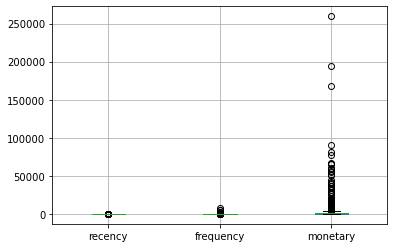

In [84]:
# Create box plots to check for outliers
rfm.boxplot()

In [85]:
# Calculate Z scores to normalize the data
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(rfm))
print(z)

[[2.34412669e+00 4.10395112e-01 1.00681678e+01]
 [9.01587778e-01 5.79924468e-02 3.11801579e-01]
 [9.21685081e-01 2.06900052e+01 4.25821942e+00]
 ...
 [8.51344520e-01 3.59882729e-01 2.25295154e-01]
 [8.91539127e-01 3.05659123e+00 3.08216554e-02]
 [4.99641715e-01 9.35447047e-02 3.53221728e-03]]


In [86]:
rfm_clean = rfm[(z < 3).all(axis=1)]

## Q. What is the purpose of the above code

The above code is implemented to remove outliers.

In [87]:
rfm.shape

(3921, 3)

In [88]:
rfm_clean.shape

(3868, 3)

## Q. Create box plot to check for outliers with the cleaned data and comment on it. Compare it with the previous box plot.

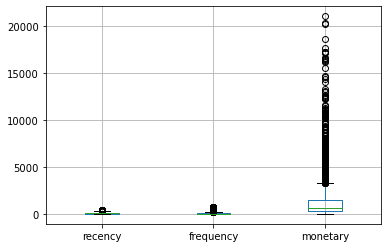

In [89]:
# Create box plots to check for outliers
rfm_clean.boxplot()

## Q. Create the Histogram for R, F, and M for the cleaned data. Comment on them and compare them with the previous histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025BB59BA400>]],
      dtype=object)

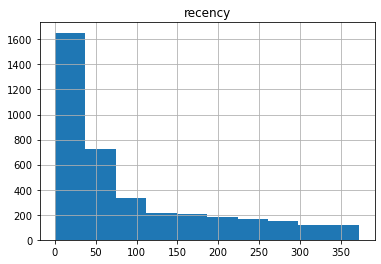

In [90]:
# Histogram for Recency Data (UK)
rfm_clean.hist(column='recency')

This histogram is made from the cleaned data and it shows recency which means the customers which has shop recently, comparing it with the above chart no change could be seen.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025BB5D5E550>]],
      dtype=object)

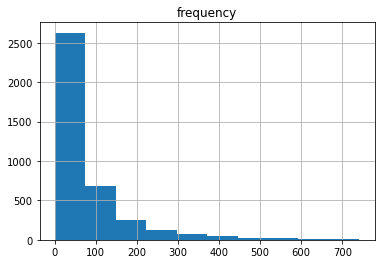

In [91]:
# Histogram for Frequency Data (UK)

rfm_clean.hist(column='frequency')

This chart shows how frequently do any customer shops, comparing it with the above chare of unclean data there is a major change here otliers cannot be found and the chart is more clear and understandable and most of them have shopped between 0 to around 70 times.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025BB59BAD30>]],
      dtype=object)

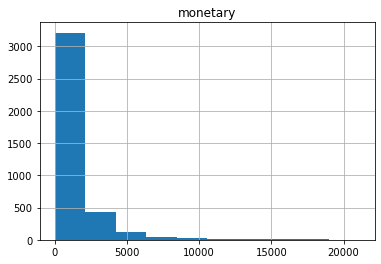

In [92]:
# Histogram for Monetary Data (UK)
rfm_clean.hist(column='monetary')

This chart also has major change comapring it to the same chart with unclean data and now the far outliers are no more in this clean data where it can be seen that most of the customers has spent somewhere around 2000.

## Perform cluster analysis using K-means clustering with the original rfm dataframe

In [93]:
X = rfm

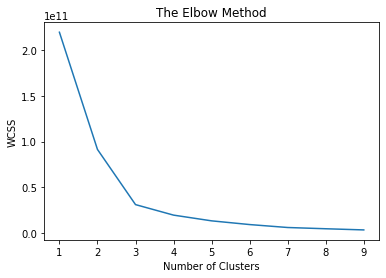

In [94]:
# Choose number of Clusters using the elbow method
# Within cluster sum of squares (wcss)
from sklearn.cluster import KMeans
# start with 10 number of clusters
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters =i, init = 'k-means++', max_iter =300, n_init =10, random_state =0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [96]:
# Fitting K Means to the Datatset using k = 3

kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)

In [97]:
# Adding cluster ID to the dataframe
rfm['Cluster_ID'] = y_kmeans

In [98]:
rfm.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
12346.0,325,1,77183,1
12747.0,2,103,4196,0
12748.0,0,4596,33719,1
12749.0,3,199,4090,0
12820.0,3,59,942,0


## Plot the graphs

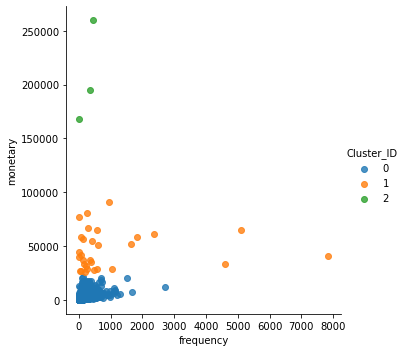

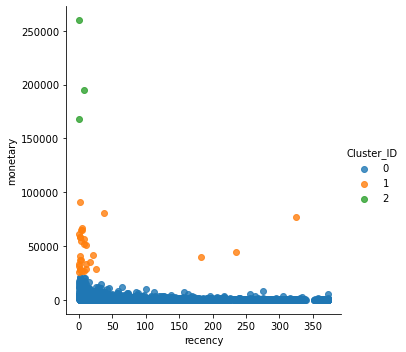

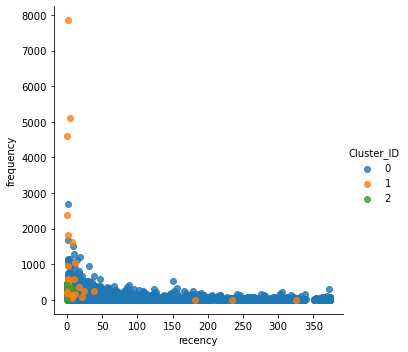

In [99]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

## Q. Comment on the plots

These above three facet charts shows comparison between retenct, frequency and monetory with each other taking 2 of them at a time, the cluster id which are 0,1,2 are shown in different colors.

The first chart give comparison between frquency and monitory and most of the points are between o and 1000 frequency and 0 to 50000 monitory with few outliers.

The second chart compares recency and monitory where most of the points are between 0 to 50000 monitory for any recency value.

The third chart is a comparison between frequency and recency here also most of the points are between 0 t 1000 frequency for different recency values.

## Q. Perform Cluster Analysis with k=4

In [100]:
# Fitting K Means to the Datatset using k = 4

kmean = KMeans(n_clusters = 4)
y_kmeans = kmean.fit_predict(X)

In [101]:
# Adding cluster ID to the dataframe
rfm['Cluster_ID'] = y_kmeans

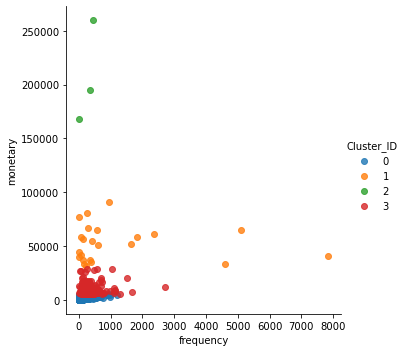

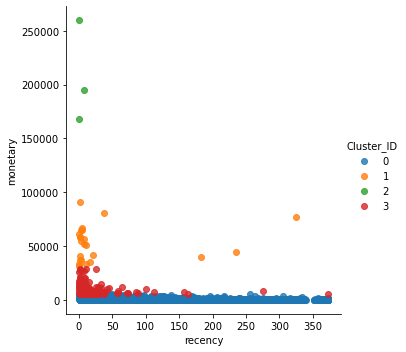

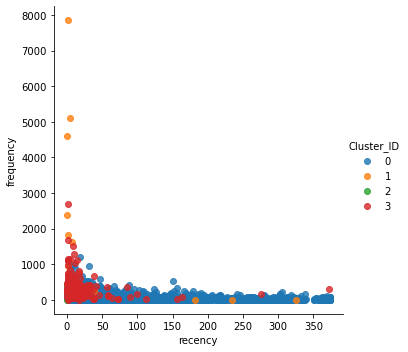

In [102]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

These above three facet charts shows comparison between retenct, frequency and monetory with each other taking 2 of them at a time, the cluster id which are 0,1,2,3 are shown in different colors. But, for this time the value of k is screased to 4.

The first chart give comparison between frquency and monitory and most of the points are between o and 1000 frequency and 0 to 50000 monitory with few outliers, and most of them has the maximum value of 4.

The second chart compares recency and monitory where most of the points are between 0 to 50000 monitory for any recency value. Where the cluster value of 1 are mostly the outliers.

The third chart is a comparison between frequency and recency here also most of the points are between 0 t 1000 frequency for different recency values. Here, majority of outliers have 2 cluster_id.

In [103]:
X1 = rfm_clean

In [104]:
rfm_clean

,recency,frequency,monetary
CustomerID,,,
12747.0,2,103,4196
12749.0,3,199,4090
12820.0,3,59,942
12821.0,214,6,92
12822.0,70,46,948
...,...,...,...
18278.0,73,9,173
18280.0,277,10,180
18281.0,180,7,80


## Q. Perform cluster analysis with the outliers removed rfm dataframe. Follow exactly the same steps including the elbow method and plot the graphs and comment on the plots. You decide what k value you should use.

In [105]:
# Fitting K Means to the Datatset using k = 3

kmean = KMeans(n_clusters = 3)
y_kmeans = kmean.fit_predict(X1)

In [106]:
# Adding cluster ID to the dataframe
rfm_clean['Cluster_ID'] = y_kmeans

<ipython-input-106-1675166c0176>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_clean['Cluster_ID'] = y_kmeans


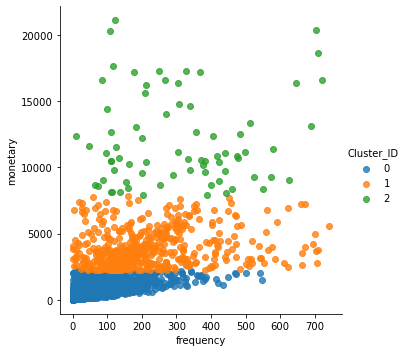

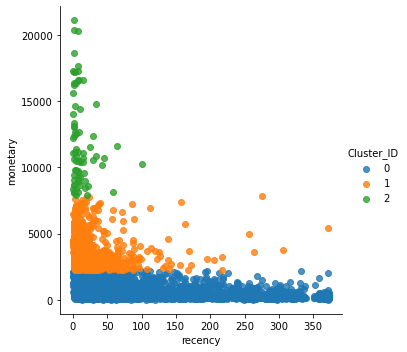

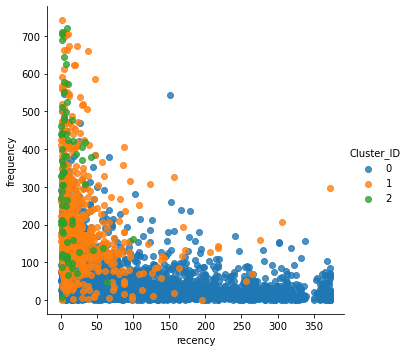

In [107]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X1, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X1, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X1, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

## Calculate mean for every cluster

In [113]:
for i in range(4): 
    rfm_clean_mean= rfm_clean.groupby(['Cluster_ID']).mean()

rfm_clean_mean

,recency,frequency,monetary
Cluster_ID,,,
0,104.938291,50.234804,668.113854
1,31.801085,207.039783,3757.645570
2,11.432432,309.513514,12022.202703


## Perform cluster analysis using hierarchical clustering with the cleaned rfm dataframe

In [114]:
# Import the libraries
import scipy.cluster.hierarchy as sch

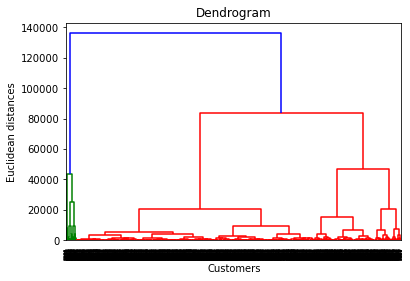

In [116]:
# Build a dendrogram using the minimum variance method
dendrogram = sch.dendrogram(sch.linkage(X1, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Identify the clusters based on dendrogram

In [117]:
# Train the hierarchical clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X1)

In [118]:
X1['Cluster_ID'] = y_hc

<ipython-input-118-343db62683d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1['Cluster_ID'] = y_hc


In [119]:
X1.head()

,recency,frequency,monetary,Cluster_ID
CustomerID,,,,
12747.0,2,103,4196,0
12749.0,3,199,4090,0
12820.0,3,59,942,0
12821.0,214,6,92,0
12822.0,70,46,948,0


## Q. Create all the three plots again. Do you observe any differences from k-means clustering method

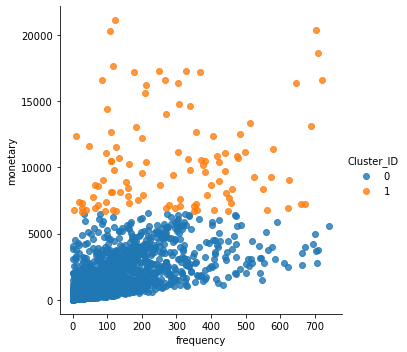

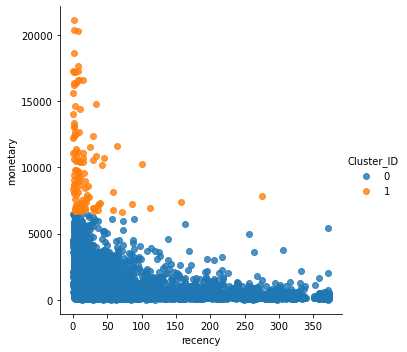

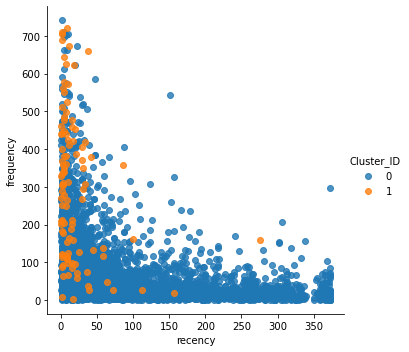

In [123]:
# Create a plot for frequency vs monetary 
facet = sns.lmplot(data=X1, x='frequency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs monetary
facet2 = sns.lmplot(data=X1, x='recency', y='monetary', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)
# Create a plot for recency vs frequency
facet2 = sns.lmplot(data=X1, x='recency', y='frequency', hue='Cluster_ID', 
                   fit_reg=False, legend=True, legend_out=True)

Here, there are only two clusters in hierarchical clustering unlike k-means clustering.

## Evaluate Clustering

In [124]:
# Import libraries
from sklearn import cluster
from sklearn import metrics

In [125]:
# Calculate Silhouette score for different cluster values
krange = list(range(2,5))
avg_silhouettes = []
for n in krange:
  model = cluster.KMeans(n_clusters=n, random_state=10)
  cluster_assignments = model.fit_predict(X1)

  silhouette_avg = metrics.silhouette_score(X1, cluster_assignments)
  avg_silhouettes.append(silhouette_avg)

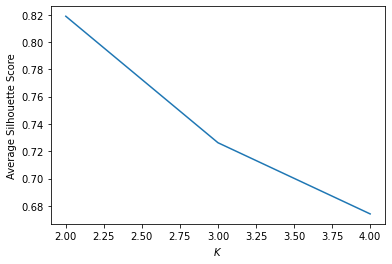

In [126]:
# PLot the score
plt.plot(krange, avg_silhouettes)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")
plt.show()